# Week5 - Lab

This part of the notebook is inspired by [Hands on Machine Learning with Scikit-Learn & TensorFlow- ch2](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb)


Use the EDA techniques we learned above to get better insight about the California Housing dataset.

## Read the data

In [2]:
import pandas as pd

def load_housing_data():
    csv_path =  "https://raw.githubusercontent.com/msaricaumbc/DS601_Fall21/main/Week05/data/housing.csv"
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()

## Data Exploration

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
# Are there columns where all rows have the same value?
for this_column in housing.columns:
    if (housing[this_column].nunique()==1):
        print(this_column)

In [14]:
# unique columns
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [15]:
uniq_per_col(housing,5)

====  longitude has 844 unique entries ====
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
Name: longitude, dtype: int64
====  latitude has 862 unique entries ====
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
Name: latitude, dtype: int64
====  housing_median_age has 52 unique entries ====
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
Name: housing_median_age, dtype: int64
====  total_rooms has 5926 unique entries ====
1527.0    18
1613.0    17
1582.0    17
2127.0    16
1717.0    15
Name: total_rooms, dtype: int64
====  total_bedrooms has 1923 unique entries ====
280.0    55
331.0    51
345.0    50
343.0    49
393.0    49
Name: total_bedrooms, dtype: int64
====  population has 3888 unique entries ====
891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
Name: population, dtype: int64
====  households has 1815 unique entries ====
306.0    57
386.0    56
335.0    56
282.0    55
429.0    54
Name: households, dty

<AxesSubplot:>

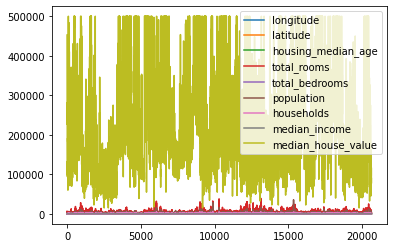

In [16]:
housing.plot()

In [17]:
import matplotlib.pyplot as plt

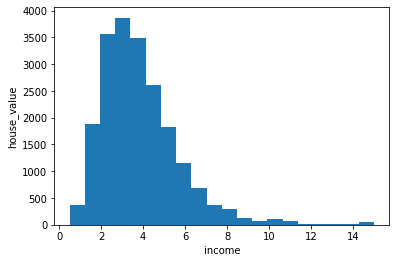

In [32]:
x = housing['median_income']
y = housing['median_house_value']
plt.hist(x,density=True,bins=20)
plt.xlabel('income')
plt.ylabel('house_value')
plt.show();
